In [1]:
%matplotlib widget
from marubatsu import Marubatsu
import matplotlib.pyplot as plt
import math

def draw_board(self, size=3):   
    fig, ax = plt.subplots(figsize=[size, size])
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.canvas.resizable = False       

    # ローカル関数としてイベントハンドラを定義する
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.move(x, y)
            self.draw_board()
            
    # fig の画像にマウスを押した際のイベントハンドラを結び付ける
    fig.canvas.mpl_connect("button_press_event", on_mouse_down)  
            
    # y 軸を反転させる
    ax.invert_yaxis()

    # 枠と目盛りを表示しないようにする
    ax.axis("off")

    # 上部のメッセージを描画する
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)

    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)

    # ゲーム盤を描画する
    plt.show()          

Marubatsu.draw_board = draw_board

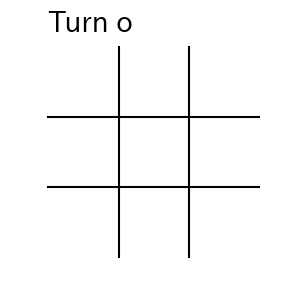

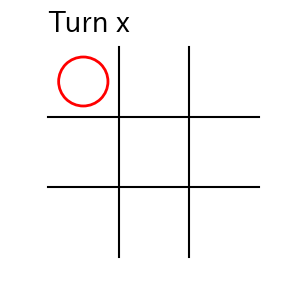

In [2]:
mb = Marubatsu()
mb.play(ai=[None, None], gui=True)

In [3]:
def draw_board(self, size=3):   
    fig, ax = plt.subplots(figsize=[size, size])
    fig.canvas.toolbar_visible = False
    fig.canvas.header_visible = False
    fig.canvas.footer_visible = False
    fig.canvas.resizable = False       

    # ローカル関数としてイベントハンドラを定義する
    def on_mouse_down(event):
        # Axes の上でマウスを押していた場合のみ処理を行う
        if event.inaxes:
            x = math.floor(event.xdata)
            y = math.floor(event.ydata)
            self.move(x, y)
            self.draw_board()
            
    # fig の画像にマウスを押した際のイベントハンドラを結び付ける
    fig.canvas.mpl_connect("button_press_event", on_mouse_down)  
            
    # y 軸を反転させる
    ax.invert_yaxis()

    # 枠と目盛りを表示しないようにする
    ax.axis("off")

    # 上部のメッセージを描画する
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)

    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)

Marubatsu.draw_board = draw_board

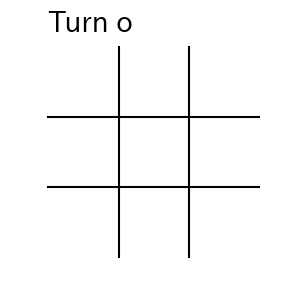

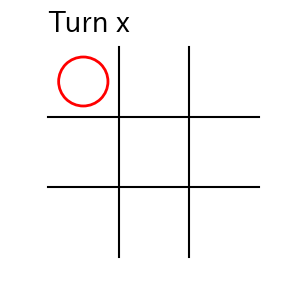

In [4]:
mb.play(ai=[None, None], gui=True)

In [5]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # 〇×ゲームを再起動する
    self.restart()

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)
                self.draw_board()
        
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # ゲーム盤の表示
        if verbose:
            if gui:
                self.draw_board()
                return
            else:
                print(self)
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board()
        else:
            print(self)
            
    return self.status
    
Marubatsu.play = play

In [6]:
def draw_board(self, size=3):             
    # y 軸を反転させる
    ax.invert_yaxis()

    # 枠と目盛りを表示しないようにする
    ax.axis("off")

    # 上部のメッセージを描画する
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)

    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)       

Marubatsu.draw_board = draw_board

In [7]:
mb.play(ai=[None, None], gui=True)

NameError: name 'size' is not defined

In [8]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # 〇×ゲームを再起動する
    self.restart()

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False   
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)
                self.draw_board()
        
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # ゲーム盤の表示
        if verbose:
            if gui:
                self.draw_board()
                return
            else:
                print(self)
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board()
        else:
            print(self)
            
    return self.status
    
Marubatsu.play = play

NameError: name 'ax' is not defined

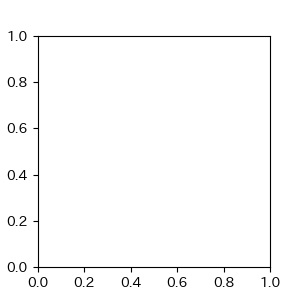

In [9]:
mb.play(ai=[None, None], gui=True)

In [10]:
def draw_board(self, ax):             
    # y 軸を反転させる
    ax.invert_yaxis()

    # 枠と目盛りを表示しないようにする
    ax.axis("off")

    # 上部のメッセージを描画する
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)

    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)

Marubatsu.draw_board = draw_board

In [11]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # 〇×ゲームを再起動する
    self.restart()

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)
                self.draw_board(ax)
        
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # ゲーム盤の表示
        if verbose:
            if gui:
                self.draw_board(ax)
                return
            else:
                print(self)
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status
    
Marubatsu.play = play


下記は、(0, 0) の上でマウスを押した場合です

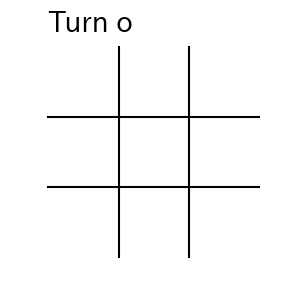

In [12]:
mb.play(ai=[None, None], gui=True)

下記は、(0, 0)、(1, 0) の順でマウスを押した場合です

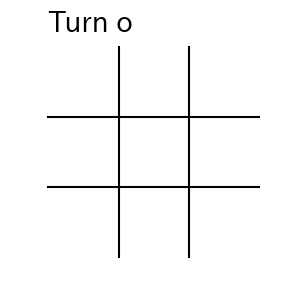

In [13]:
mb.play(ai=[None, None], gui=True)

下記は、(0, 0)、(1, 0)、(2, 2) の順でマウスを押した場合です

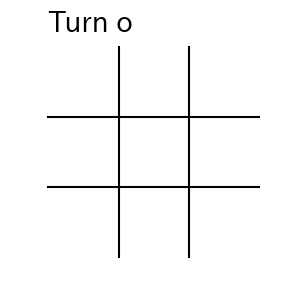

In [14]:
mb.play(ai=[None, None], gui=True)

In [15]:
def draw_board(self, ax):             
    # 上部のメッセージを描画する
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)

    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)

Marubatsu.draw_board = draw_board

In [16]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # 〇×ゲームを再起動する
    self.restart()

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)
                self.draw_board(ax)
        
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

        # y 軸を反転させる
        ax.invert_yaxis()
    
        # 枠と目盛りを表示しないようにする
        ax.axis("off")

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # ゲーム盤の表示
        if verbose:
            if gui:
                self.draw_board(ax)
                return
            else:
                print(self)
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status
    
Marubatsu.play = play

下記は、(0, 0)、(1, 0)、(2, 2) の順でマウスを押した場合です

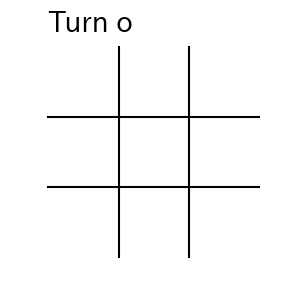

In [17]:
mb.play(ai=[None, None], gui=True)

In [18]:
def draw_board(self, ax):             
    # Axes の内容をクリアして、これまでの描画内容を削除する
    ax.clear()
    
    # 上部のメッセージを描画する
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)

    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)

Marubatsu.draw_board = draw_board

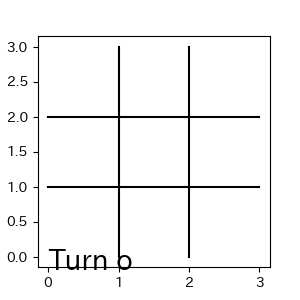

In [19]:
mb.play(ai=[None, None], gui=True)

In [20]:
def draw_board(self, ax):             
    # Axes の内容をクリアして、これまでの描画内容を削除する
    ax.clear()
    
    # y 軸を反転させる
    ax.invert_yaxis()
    
    # 枠と目盛りを表示しないようにする
    ax.axis("off")
    
    # 上部のメッセージを描画する
    # ゲームの決着がついていない場合は、手番を表示する
    if self.status == Marubatsu.PLAYING:
        text = "Turn " + self.turn
    # 決着がついていれば勝者を表示する
    else:
        text = "winner " + self.status
    ax.text(0, -0.2, text, fontsize=20)

    # ゲーム盤の枠を描画する
    for i in range(1, self.BOARD_SIZE):
        ax.plot([0, self.BOARD_SIZE], [i, i], c="k") # 横方向の枠線
        ax.plot([i, i], [0, self.BOARD_SIZE], c="k") # 縦方向の枠線   

    # ゲーム盤のマークを描画する
    for y in range(self.BOARD_SIZE):
        for x in range(self.BOARD_SIZE):
            color = "red" if (x, y) == self.last_move else "black"
            self.draw_mark(ax, x, y, self.board[x][y], color)

Marubatsu.draw_board = draw_board

In [21]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # 〇×ゲームを再起動する
    self.restart()

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合のみ処理を行う
            if event.inaxes:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)
                self.draw_board(ax)
        
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # ゲーム盤の表示
        if verbose:
            if gui:
                self.draw_board(ax)
                return
            else:
                print(self)
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status
    
Marubatsu.play = play

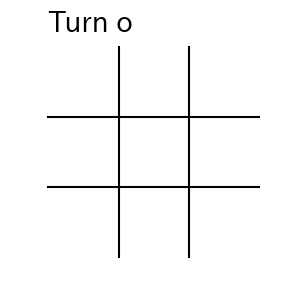

In [23]:
mb.play(ai=[None, None], gui=True)

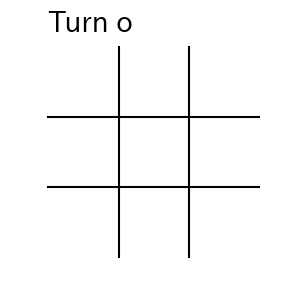

In [24]:
mb.play(ai=[None, None], gui=True)

In [25]:
def play(self, ai, params=[{}, {}], verbose=True, seed=None, gui=False, size=3):
    # seed が None でない場合は、seed を乱数の種として設定する
    if seed is not None:
        random.seed(seed)
    
    # 〇×ゲームを再起動する
    self.restart()

    # gui が True の場合に、ゲーム盤を描画する画像を作成し、イベントハンドラに結びつける
    if gui:
        fig, ax = plt.subplots(figsize=[size, size])
        fig.canvas.toolbar_visible = False
        fig.canvas.header_visible = False
        fig.canvas.footer_visible = False
        fig.canvas.resizable = False          
        
        # ローカル関数としてイベントハンドラを定義する
        def on_mouse_down(event):
            # Axes の上でマウスを押していた場合で、ゲーム中の場合のみ処理を行う
            if event.inaxes and self.status == Marubatsu.PLAYING:
                x = math.floor(event.xdata)
                y = math.floor(event.ydata)
                self.move(x, y)                
                self.draw_board(ax)
        
        # fig の画像にマウスを押した際のイベントハンドラを結び付ける
        fig.canvas.mpl_connect("button_press_event", on_mouse_down)     
               

    # ゲームの決着がついていない間繰り返す
    while self.status == Marubatsu.PLAYING:
        # ゲーム盤の表示
        if verbose:
            if gui:
                self.draw_board(ax)
                return
            else:
                print(self)
        # 現在の手番を表す ai のインデックスを計算する
        index = 0 if self.turn == Marubatsu.CIRCLE else 1
        # ai が着手を行うかどうかを判定する
        if ai[index] is not None:
            x, y = ai[index](self, **params[index])
        else:
            # キーボードからの座標の入力
            coord = input("x,y の形式で座標を入力して下さい。exit を入力すると終了します")
            # "exit" が入力されていればメッセージを表示して関数を終了する
            if coord == "exit":
                print("ゲームを終了します")
                return       
            # x 座標と y 座標を要素として持つ list を計算する
            xylist = coord.split(",")
            # xylist の要素の数が 2 ではない場合
            if len(xylist) != 2:
                # エラーメッセージを表示する
                print("x, y の形式ではありません")
                # 残りの while 文のブロックを実行せずに、次の繰り返し処理を行う
                continue
            x, y = xylist
        # (x, y) に着手を行う
        try:
            self.move(int(x), int(y))
        except:
            print("整数の座標を入力して下さい")

    # 決着がついたので、ゲーム盤を表示する
    if verbose:
        if gui:
            self.draw_board(ax)
        else:
            print(self)
            
    return self.status
    
Marubatsu.play = play

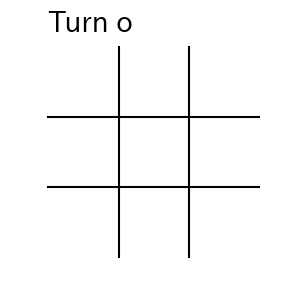

In [26]:
mb.play(ai=[None, None], gui=True)